In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Lecture 10 ##

## Prediction ##

In [2]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [3]:
parent_avgs = (families.column('father') + families.column('mother'))/2
parent_avgs

array([ 72.75,  72.75,  72.75,  72.75,  71.  ,  71.  ,  71.  ,  71.  ,
        69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  69.5 ,  66.75,
        66.75,  66.75,  66.75,  66.75,  66.75,  71.  ,  71.  ,  71.  ,
        71.  ,  71.  ,  71.  ,  71.  ,  70.25,  70.25,  70.25,  70.25,
        69.75,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,  68.  ,
        68.  ,  67.5 ,  70.  ,  70.  ,  70.  ,  70.  ,  69.75,  69.75,
        69.75,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,  69.  ,
        69.  ,  69.  ,  68.75,  68.75,  68.75,  68.75,  68.75,  68.75,
        68.5 ,  68.5 ,  68.5 ,  68.1 ,  70.85,  70.85,  70.85,  70.85,
        70.85,  70.85,  70.85,  70.85,  70.  ,  70.  ,  70.  ,  69.5 ,
        69.5 ,  69.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,  68.5 ,
        68.5 ,  68.75,  68.  ,  68.  ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,  67.5 ,
        67.5 ,  67.5 ,  68.  ,  68.  ,  68.  ,  67.  ,  67.25,  67.25,
      

In [4]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


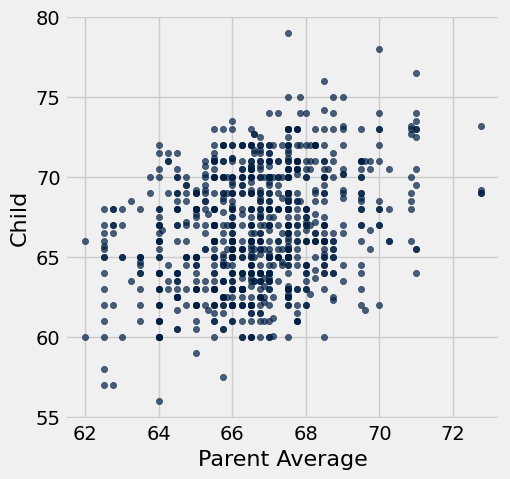

In [5]:
heights.scatter('Parent Average','Child')

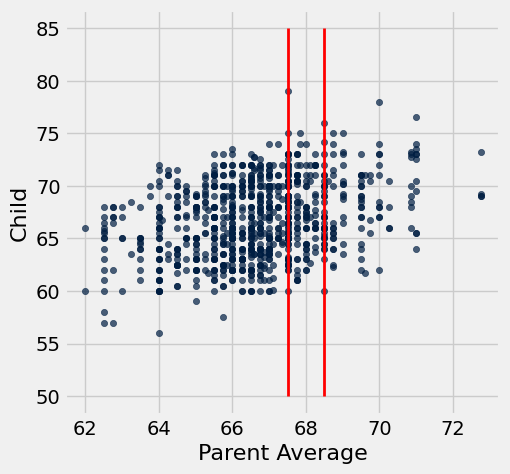

In [6]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [9]:
nearby = heights.where('Parent Average',are.between(67.5,68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

67.620000000000005

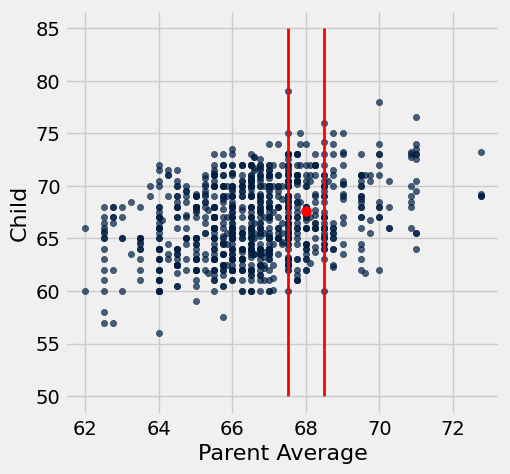

In [10]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

**Activity:** What if you wanted to predict the height of a child for parents of average height 68, 70, and 73? Define a function in the cell below to help us do this. 

In [11]:
def predict(h):
    nearby = heights.where('Parent Average',are.between(h - 0.5,h + 0.5))
    return np.average(nearby.column('Child'))

In [12]:
predict(68)

67.620000000000005

In [13]:
predict(70)

68.561904761904756

In [14]:
predict(73)

70.099999999999994

**Activity:** How would you make a prediction for each row of parents in the `heights` table? Fill in the cell below.

In [16]:
predicted_heights = heights.apply(predict, 'Parent Average')

In [18]:
heights = heights.with_column('Prediction', predicted_heights).select('Parent Average','Sex','Child','Prediction')
heights

Parent Average,Sex,Child,Prediction
72.75,male,73.2,70.1
72.75,female,69.2,70.1
72.75,female,69,70.1
72.75,female,69,70.1
71,male,73.5,70.4158
71,male,72.5,70.4158
71,female,65.5,70.4158
71,female,65.5,70.4158
69.5,male,71,68.5025
69.5,female,68,68.5025


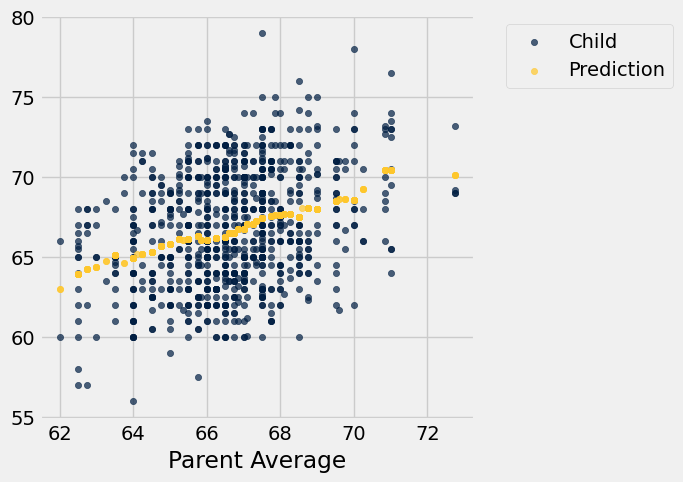

In [19]:
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

## Prediction Accuracy ##

In [20]:
def difference(predicted, actual):
    return predicted - actual

In [21]:
pred_errs = heights.apply(difference,'Prediction','Child')
heights = heights.with_column('errors',pred_errs)
heights

Parent Average,Sex,Child,Prediction,errors
72.75,male,73.2,70.1,-3.1
72.75,female,69.2,70.1,0.9
72.75,female,69,70.1,1.1
72.75,female,69,70.1,1.1
71,male,73.5,70.4158,-3.08421
71,male,72.5,70.4158,-2.08421
71,female,65.5,70.4158,4.91579
71,female,65.5,70.4158,4.91579
69.5,male,71,68.5025,-2.4975
69.5,female,68,68.5025,0.5025


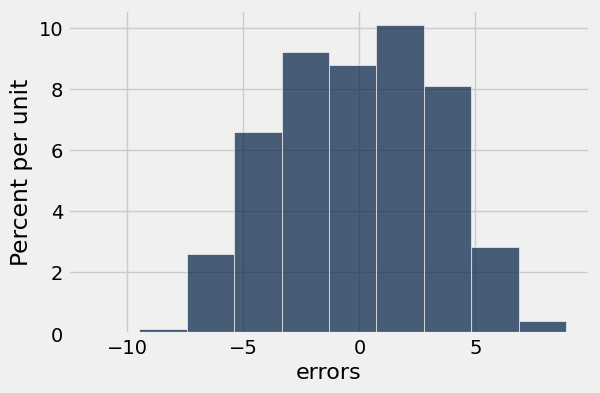

In [22]:
heights.hist('errors')

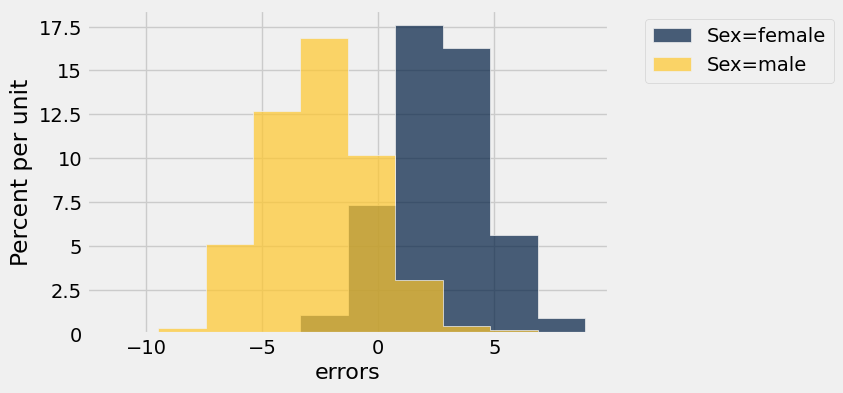

In [23]:
heights.hist('errors',group='Sex')

# Discussion Questions
How could we take sex of the child into account when making predictions? 
Does that lead to smaller errors?

In [24]:
def predict_smarter(h, s):
    nearby = heights.where('Parent Average',are.between(h - 0.5,h + 0.5))
    nearby_same_sex = nearby.where('Sex',s)
    return np.average(nearby_same_sex.column('Child'))

In [25]:
predict_smarter(68, 'female')

64.983516483516482

In [26]:
predict_smarter(68, 'male')

70.172340425531914

In [27]:
smarter_predicted_heights = heights.apply(predict_smarter, 'Parent Average', 'Sex')
heights = heights.with_column('Smarter Prediction', smarter_predicted_heights)

In [28]:
smarter_pred_errs = heights.apply(difference, 'Child', 'Smarter Prediction')
heights = heights.with_column('Smarter Errors', smarter_pred_errs)

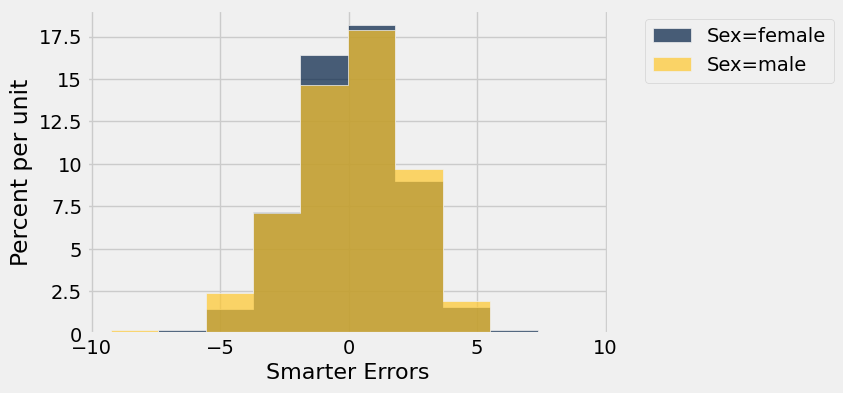

In [31]:
heights.hist('Smarter Errors',group = 'Sex')

## Grouping by One Column ##

In [32]:
cones = Table.read_table('cones.csv').drop('Color')
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


In [33]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [34]:
cones.group('Flavor',np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [35]:
cones.group('Flavor',np.min)

Flavor,Price amin
bubblegum,4.75
chocolate,4.75
strawberry,3.55


Another example

In [36]:
heights.select('Sex','Child').group('Sex',np.average)

Sex,Child average
female,64.104
male,69.2341


## Grouping By One Column: Welcome Survey ##

In [37]:
survey = Table.read_table('data111_survey_fa24.csv')
survey.show(3)

Timestamp,Pets,Handedness,Extroversion,Texts,Hours of Sleep,Sleep Position,Pant Leg,Piercings,Food Preference
2024/08/26 10:11:55 AM MDT,Dog;Cat;Bunny;Bearded Dragon,Right,4,3,9,On your right side,Right,0,Savory
2024/08/26 10:18:32 AM MDT,Dog,Right,4,8,8,On your left side,Right,2,Sweet
2024/08/26 10:52:17 AM MDT,Cat,Right,4,7,7,On your right side,Right,2,Savory


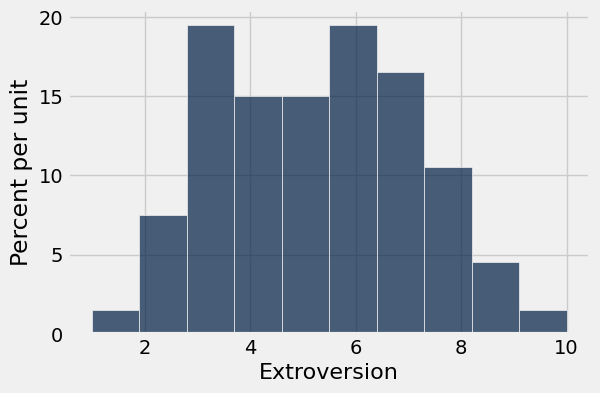

In [38]:
survey.hist('Extroversion')

In [40]:
survey.group('Extroversion')

Extroversion,count
1,1
2,5
3,13
4,10
5,10
6,13
7,11
8,7
9,3
10,1


In [39]:
by_extra = survey.group('Extroversion',np.average)
by_extra

Extroversion,Timestamp average,Pets average,Handedness average,Texts average,Hours of Sleep average,Sleep Position average,Pant Leg average,Piercings average,Food Preference average
1,,,,0,7.5,,,0,
2,,,,3.4,7,,,0.4,
3,,,,3.30769,7.26923,,,2.23077,
4,,,,4.4,7.52,,,1.8,
5,,,,4.3,7.1,,,1,
6,,,,3.53846,6.65385,,,2.53846,
7,,,,5.27273,7.22727,,,2.81818,
8,,,,6.71429,7.85714,,,2.57143,
9,,,,6.33333,5.5,,,2.66667,
10,,,,7,7,,,0,


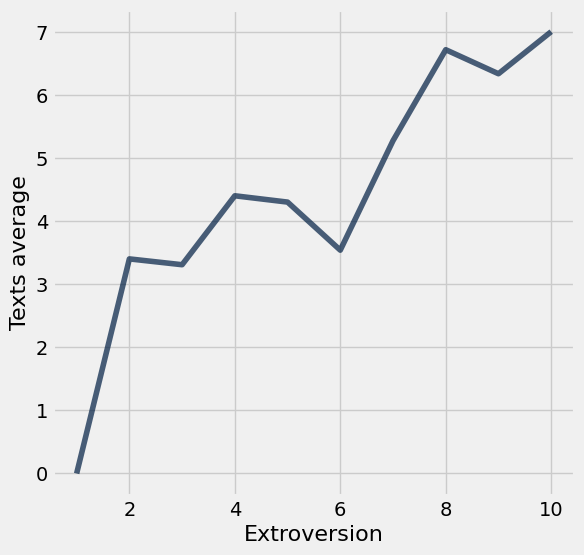

In [41]:
by_extra.plot('Extroversion','Texts average')

In [42]:
survey.group('Sleep Position')

Sleep Position,count
On your back,11
On your left side,29
On your right side,24
On your stomach,10


In [44]:
survey.select('Sleep Position', 'Hours of Sleep').group('Sleep Position',np.average)

Sleep Position,Hours of Sleep average
On your back,7.04545
On your left side,7.17931
On your right side,7.22917
On your stomach,6.85


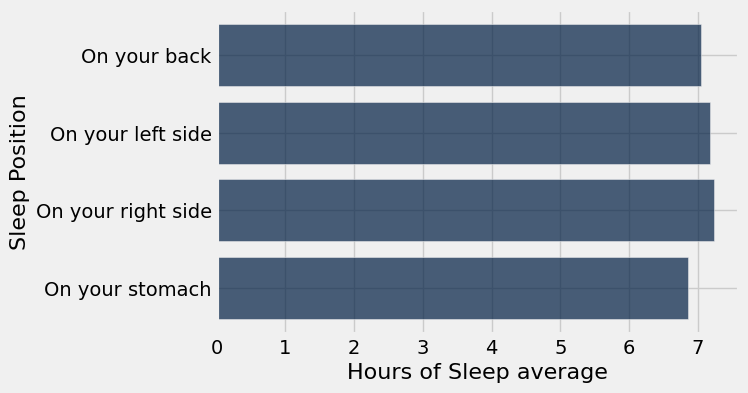

In [45]:
survey.select("Sleep Position", "Hours of Sleep").group('Sleep Position', np.average).barh('Sleep Position')

## Lists

In [46]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [48]:
type([1, 5, 'hello', 5.0, make_array(1,2,3)])

list

## Grouping by Two Columns ##

Do right-handed people tend to sleep on their left side and left-handed people sleep on their right?

In [49]:
survey.group(['Handedness', 'Sleep Position']).show()

Handedness,Sleep Position,count
Left,On your back,2
Left,On your left side,4
Left,On your right side,2
Left,On your stomach,1
Right,On your back,9
Right,On your left side,25
Right,On your right side,22
Right,On your stomach,9


**Discussion question**

In [50]:
pets = Table().with_columns('Type',make_array('dog','cat','dog','dog','bird','cat','dog','bird'),
                            'Color',make_array('black','black','multi','black','multi','black','white','multi'),
                           'Num Legs', make_array(4,4,4,3,2,4,4,2),
                           'Length', make_array(20,16,50,34,8,18,44,7),
                           'Cute score',make_array(8,7,9,7,8,10,3,8)
                           )
pets

Type,Color,Num Legs,Length,Cute score
dog,black,4,20,8
cat,black,4,16,7
dog,multi,4,50,9
dog,black,3,34,7
bird,multi,2,8,8
cat,black,4,18,10
dog,white,4,44,3
bird,multi,2,7,8


In [52]:
pets.group('Type')

Type,count
bird,2
cat,2
dog,4


In [51]:
(pets.select('Type','Num Legs','Cute score')
.group('Type',np.min))


Type,Num Legs amin,Cute score amin
bird,2,8
cat,4,7
dog,3,3


In [53]:
pets.group(['Type','Color'])

Type,Color,count
bird,multi,2
cat,black,2
dog,black,2
dog,multi,1
dog,white,1
